In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
ordinal_lasso = pd.read_csv('Ordinal+Lasso.csv')
ordinal_lasso.shape

(2580, 84)

In [3]:
X_ordinal = ordinal_lasso.drop(['SalePrice'], axis=1).values
Y_ordinal = ordinal_lasso.SalePrice.values

In [4]:
X_ordinal.shape

(2580, 83)

In [5]:
len(Y_ordinal)

2580

In [6]:
X_ordinal.shape[1]

83

In [7]:
AR2_Ordinal = []
MAE_Ordinal = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_ordinal)-1)/(len(Y_ordinal)-X_ordinal.shape[1]-1)
    AR2_Ordinal.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Ordinal.append(mae)

In [8]:
Ordinal = pd.DataFrame({'AR2_Ordinal': AR2_Ordinal, 'MAE_Ordinal': MAE_Ordinal})
Ordinal

,AR2_Ordinal,MAE_Ordinal
0,0.941313,11989.227234
1,0.905510,12671.038542
2,0.914066,12296.636117
3,0.913221,11399.814298
4,0.950785,11319.954240
5,0.933082,12493.822144
6,0.946534,11983.891545
7,0.907345,11658.572864
8,0.914786,12278.395227
9,0.936168,11553.005954


In [9]:
Ordinal.describe()

,AR2_Ordinal,MAE_Ordinal
count,100.000000,100.000000
mean,0.932660,11843.550569
std,0.016575,538.082212
min,0.899193,10597.978480
25%,0.916001,11475.916699
50%,0.939193,11896.469316
75%,0.946643,12207.970811
max,0.957474,13140.460867


In [10]:
ord_lasso_drop1 = pd.read_csv('Ordinal+Lasso_Drop1.csv')
ord_lasso_drop1.shape

(2579, 84)

In [12]:
X_ord_drop1 = ord_lasso_drop1.drop(['SalePrice'], axis=1).values
Y_ord_drop1 = ord_lasso_drop1.SalePrice.values

In [13]:
X_ord_drop1.shape

(2579, 83)

In [14]:
len(Y_ord_drop1)

2579

In [15]:
X_ord_drop1.shape[1]

83

In [16]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ord_drop1,Y_ord_drop1,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_ord_drop1)-1)/(len(Y_ord_drop1)-X_ord_drop1.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)

In [17]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.943618,11204.554970
1,0.944341,11994.716457
2,0.943795,11678.387858
3,0.947510,11665.370949
4,0.940715,11749.405292
5,0.950398,11184.199745
6,0.945857,11255.890544
7,0.940568,11633.351254
8,0.945071,11698.000162
9,0.945204,11592.485466


In [18]:
OrdinalDrop1.describe()

,AR2_Drop1,MAE_Drop1
count,100.000000,100.000000
mean,0.947646,11418.107721
std,0.005266,435.172713
min,0.926057,10512.169375
25%,0.944998,11112.612998
50%,0.948397,11331.627989
75%,0.950580,11732.711471
max,0.957761,12578.217182


In [19]:
ord_lasso_dropIF = pd.read_csv('Ordinal+Lasso_DropIF.csv')
ord_lasso_dropIF.shape

(2568, 84)

In [20]:
X3 = ord_lasso_dropIF.drop(['SalePrice'], axis=1).values
Y3 = ord_lasso_dropIF.SalePrice.values

In [21]:
X3.shape

(2568, 83)

In [22]:
len(Y3)

2568

In [23]:
X3.shape[1]

83

In [24]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y3)-1)/(len(Y3)-X3.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [25]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.939277,11467.532565
1,0.938039,11466.555289
2,0.944100,11235.496647
3,0.951678,11138.495396
4,0.950849,11885.376278
5,0.949669,10942.460067
6,0.946479,11006.484389
7,0.951466,11793.355487
8,0.947656,11261.119572
9,0.956125,11461.938993


In [26]:
OrdinalDropIF.describe()

,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000
mean,0.947672,11358.428298
std,0.005478,358.309390
min,0.932256,10485.415582
25%,0.944089,11192.818241
50%,0.948336,11349.554049
75%,0.951759,11594.821250
max,0.957541,12144.073956


In [27]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.941313,11989.227234,0.943618,11204.554970,0.939277,11467.532565
1,0.905510,12671.038542,0.944341,11994.716457,0.938039,11466.555289
2,0.914066,12296.636117,0.943795,11678.387858,0.944100,11235.496647
3,0.913221,11399.814298,0.947510,11665.370949,0.951678,11138.495396
4,0.950785,11319.954240,0.940715,11749.405292,0.950849,11885.376278
5,0.933082,12493.822144,0.950398,11184.199745,0.949669,10942.460067
6,0.946534,11983.891545,0.945857,11255.890544,0.946479,11006.484389
7,0.907345,11658.572864,0.940568,11633.351254,0.951466,11793.355487
8,0.914786,12278.395227,0.945071,11698.000162,0.947656,11261.119572
9,0.936168,11553.005954,0.945204,11592.485466,0.956125,11461.938993


In [28]:
box.describe()

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.932660,11843.550569,0.947646,11418.107721,0.947672,11358.428298
std,0.016575,538.082212,0.005266,435.172713,0.005478,358.309390
min,0.899193,10597.978480,0.926057,10512.169375,0.932256,10485.415582
25%,0.916001,11475.916699,0.944998,11112.612998,0.944089,11192.818241
50%,0.939193,11896.469316,0.948397,11331.627989,0.948336,11349.554049
75%,0.946643,12207.970811,0.950580,11732.711471,0.951759,11594.821250
max,0.957474,13140.460867,0.957761,12578.217182,0.957541,12144.073956


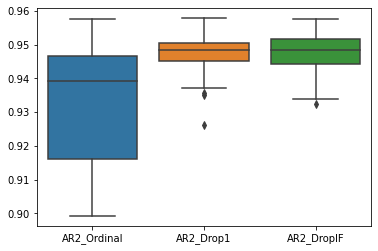

In [29]:
sns.boxplot(data=box[['AR2_Ordinal','AR2_Drop1','AR2_DropIF']]);

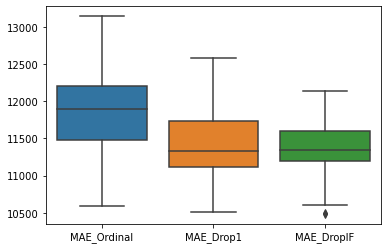

In [30]:
sns.boxplot(data=box[['MAE_Ordinal','MAE_Drop1','MAE_DropIF']]);